In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating data-sets
* We choose a line `y = mx + c` and generate random points around it by adding some gaussian noise to it.
* We take `m` and `c` as user input and generate the data-set accordingly consisting of `100` points where `x` is in the range `[1, 500]`.
* We plot the data-set generated.

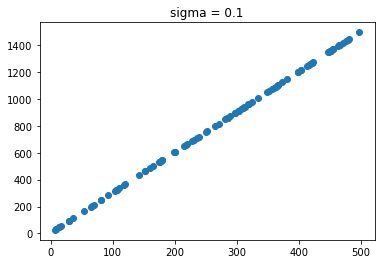

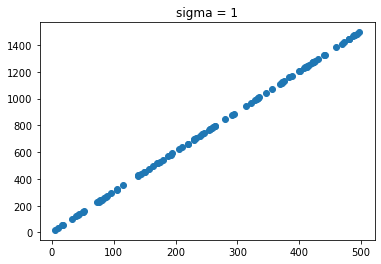

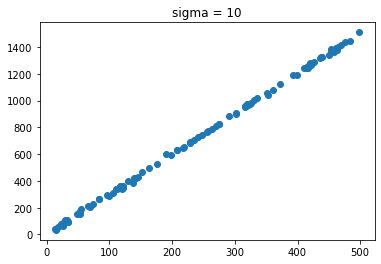

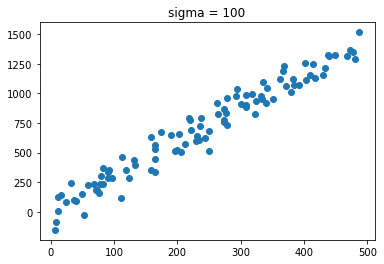

In [101]:
m = input("Enter the value of m: ")
m = int(m)
c = input("Enter the value of c: ")
c = int(c)
Y = {
    1 : [], # sigma = 0.1
    2 : [], # sigma = 1
    3 : [], # sigma = 10
    4 : []  # sigma = 100
}
X = {
    1 : [], # sigma = 0.1
    2 : [], # sigma = 1
    3 : [], # sigma = 10
    4 : []  # sigma = 100
}
sigma = [0.1,1,10,100]

for i in range(1,5):
    for j in range(100):
        x = np.random.uniform(1,500)
        y = m*x + c + np.random.normal(0,sigma[i-1])
        X[i].append(x)
        Y[i].append(y)
    plt.scatter(X[i],Y[i])
    plt.title("sigma = "+str(sigma[i-1]))
    plt.show()

# Gradient Descent
* We have have data set X with true labels Y.
* We have to find the best fit line for the data-set generated.

In [102]:
def gradient_descent(X, Y, learning_rate, iterations, min_update, delta):
    X = np.c_[X, np.ones(len(X))]
    w = np.random.rand(X.shape[1])
    n = len(X)

    for i in range(iterations):
        Y_pred = np.dot(X, w)
        error = Y_pred - Y
        gradient = 2 * np.dot(X.T, error) / n
        w = w - learning_rate * gradient
        delta.append(np.sum(np.abs(gradient)))
        if delta[-1] < min_update:
            break

    return w


Weights :  [3.01156217 1.01510062]


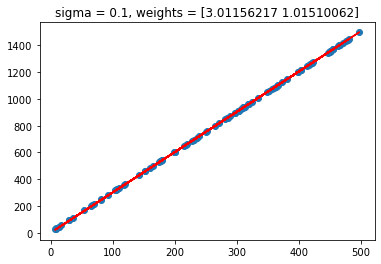

Weights :  [3.01095967 1.17998529]


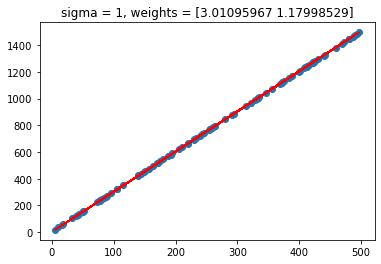

Weights :  [3.01401803 0.32188591]


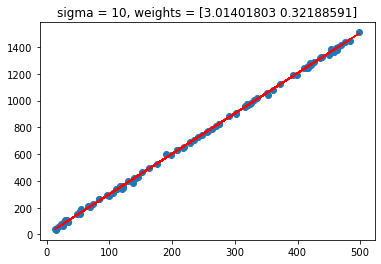

Weights :  [2.92745713 0.74299668]


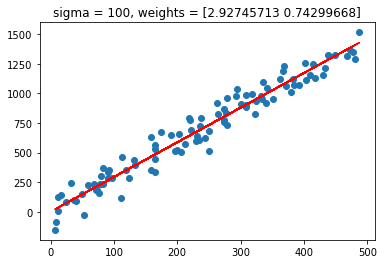

In [103]:
Y_pred = {
    1 : [], # sigma = 0.1
    2 : [], # sigma = 1
    3 : [], # sigma = 10
    4 : []  # sigma = 100
}

delta_with_iter = {
    1 : [], # sigma = 0.1
    2 : [], # sigma = 1
    3 : [], # sigma = 10
    4 : []  # sigma = 100
}
learning_rate = 0.000001
iterations = 100000
min_update = 0.0001
for i in range(1,5):
    w = gradient_descent(X[i],Y[i],learning_rate, iterations, min_update,delta_with_iter[i])
    n = len(X[i])
    print("Weights : ",w)
    Y_pred[i] = np.dot(np.c_[X[i], np.ones(len(X[i]))], w)
    plt.scatter(X[i],Y[i])
    plt.plot(X[i],Y_pred[i],color = 'red')
    plt.title("sigma = "+str(sigma[i-1]) + ", weights = "+str(w))
    plt.show()

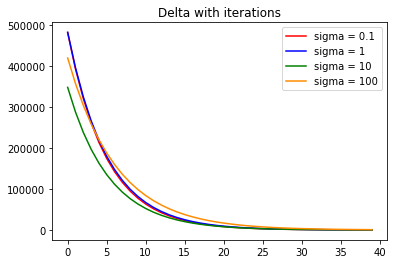

In [104]:
# plot delta with iterations for all 4 in same plot with different colors also add legend
plt.plot(delta_with_iter[1][0:40],color = 'red')
plt.plot(delta_with_iter[2][0:40],color = 'blue')
plt.plot(delta_with_iter[3][0:40],color = 'green')
plt.plot(delta_with_iter[4][0:40],color = 'darkorange')
plt.title("Delta with iterations")
plt.legend(['sigma = 0.1','sigma = 1','sigma = 10','sigma = 100'])
plt.show()